# Modeling 3: Dimensionalitätsreduktion

## Anforderungen an Projektumsetzung: Dimensionalitätsreduktion

Falls die Anforderungen auf den eigenen Projektdatensatz nicht anwendbar sind, gibt es folgende Möglichkeiten:
- Datensatz um passende Daten erweitern entweder manuell, per Anspielen aus weiterer Datenquelle oder zur Not per zufälliger Datengenerierung/-simulation
- Datensatz außerhalb des Projekts wählen und Anforderungen daran umsetzen

Anforderungen:
- Definieren Sie für Ihren Datensatz ein oder mehrere Ziele, die Sie mit Hilfe von Dimensionsreduktion der Daten
  erreichen wollen.

- Führen Sie mit dem Algorithmus Ihrer Wahl eine Dimensionsreduktion auf Ihren Daten durch.

- Setzen Sie ggf. die Parameter des Algorithmus zur Dimensionsreduktion mit Hilfe einer Pipeline.

- Beschreiben Sie Ihre Ergebnisse. Haben Sie Ihr(e) Ziel(e) erreicht?

#### Laden der Bibliotheken & des Datensatzes

In [1]:
# Import der benötigten Bibliotheken

import importlib
import init_notebook

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
importlib.reload(init_notebook)

dataset = init_notebook.get_final_dataset()

#### Definieren Sie für Ihren Datensatz ein oder mehrere Ziele, die Sie mit Hilfe von Dimensionsreduktion der Daten erreichen wollen.

1) Verbesserung der Modellleistung: 

    In verschiedenen methodischen Ansätzen, wie etwa der Feature Selection oder einer Hybridform aus Feature Selection und Korrelationsanalyse, zeigt sich eine hohe zeitliche Beanspruchung bei der Modellberechnung (>50 Minuten). 

    Die Dimensionalitätsreduktion erweist sich als erfolgversprechenden Ansatz, um die Anzahl der Merkmale zu reduzieren. 

    Durch diese Maßnahme kann nicht nur die Generalisierungsfähigkeit des Modells verbessert, sondern auch die Gesamtdurchlaufzeit verringert werden.

    

2) Verbesserte Präzision: 

    Im Rahmen der Untersuchungen haben auf Kaggle sämtliche verfügbaren Notebooks, die darauf abzielen, Raucher zu identifizieren, eine Präzision von 65 % bis maximal 74 % erreicht. 

    Ein zusätzliches Ziel besteht darin, eine vergleichbare, wenn nicht sogar verbesserte Präzision zu erlangen.

#### Führen Sie mit dem Algorithmus Ihrer Wahl eine Dimensionsreduktion auf Ihren Daten durch.

In [3]:
# Auswahl der Komponenten basierent auf der Feature Selektion in 6_Klassifikation, da der Fokus hier ebenso auf dem Raucherstatus liegt:

data = dataset[['Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker']]

In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA durchführen
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

# Erklärte Varianz pro Principal Component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

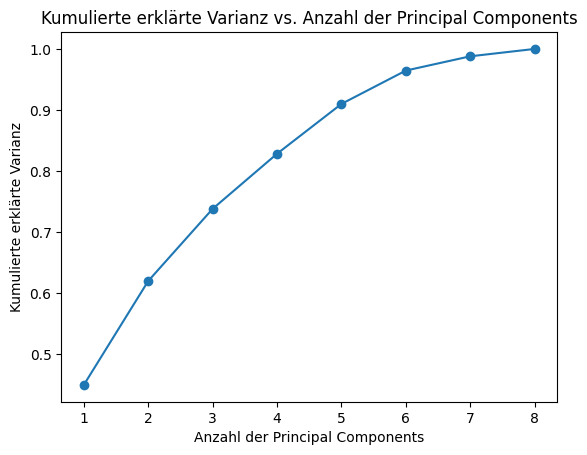

In [5]:
# Visualisierung der kumulierten erklärten Varianz

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Anzahl der Principal Components')
plt.ylabel('Kumulierte erklärte Varianz')
plt.title('Kumulierte erklärte Varianz vs. Anzahl der Principal Components')
plt.show()

In [6]:
# Ausgabe der Komponenten und der Features 

principal_components.shape

(990969, 8)

In [7]:
# Standardscaler verwenden 
data_subset = StandardScaler().fit_transform(data)

# Hauptkomponentenanalyse mit 90% Varianzerklärung (Erfahrungswert)
pca = PCA(n_components=0.9)

data_pca = pca.fit_transform(data)

# Daten ausgeben 
data_pca.shape

# Umwandeln in Dataframe 
dataframe_pca = pd.DataFrame(data_pca)

Ergebnis:
Reduktion auf zwei Features bei Erklärbarkeit von 90% der Gesamtvarianz.

Weiteres Vorgehen / Überlegungen: Verschiedene Zusammensetzung der Inputkomponenten, als auch höhere Varanzerklärung in einer Pipeline. 

#### Setzen Sie ggf. die Parameter des Algorithmus zur Dimensionsreduktion mit Hilfe einer Pipeline.

In [11]:
# Neuladen des Datensatzes:

importlib.reload(init_notebook)

dataset = init_notebook.get_final_dataset()

Initiale Pipeline:

In [8]:
# Schritte in der Pipeline
steps = [
    ('scaler', StandardScaler()), # Vorverarbeitung: Skalierung der Daten
    ('dimension_reduction', PCA(n_components=0.99)),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000)) # Softmax Regression als Classifier
]

# Erstellung der Pipeline
pipeline = Pipeline(steps)

In [12]:
# Vergabe neuer Features für den ausgewählten Datensatz

data_1 = dataset[['Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker', 'Raucher_Status']]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_1.drop(columns=['Raucher_Status']), data_1['Raucher_Status'], test_size=0.2, random_state=42)

In [13]:
# Training der Pipeline
pipeline.fit(X_train_1, y_train_1)

# Bewertung der Pipeline
accuracy = pipeline.score(X_test_1, y_test_1)

print(f"Genauigkeit der Pipeline: {accuracy}")

Genauigkeit der Pipeline: 0.6872761032120044


Um die Genauigkeit der Pipeline von rund 68,73 % zu verbessern, wird folgend mit den Parametern der Pipeline und den Features variiert:

In [26]:
# Schritte in der Pipeline (95 % Gesamtvarianz)
steps = [
    ('scaler', StandardScaler()), # Vorverarbeitung: Skalierung der Daten
    ('dimension_reduction', PCA(n_components=0.95)),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000)) # Softmax Regression als Classifier
]

# Erstellung der Pipeline
pipeline = Pipeline(steps)


# Vergabe neuer Features für den ausgewählten Datensatz

data_1 = dataset[['Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP', 'Trinker', 'Raucher_Status']]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_1.drop(columns=['Raucher_Status']), data_1['Raucher_Status'], test_size=0.2, random_state=42)


# Training der Pipeline
pipeline.fit(X_train_1, y_train_1)

# Bewertung der Pipeline
accuracy = pipeline.score(X_test_1, y_test_1)

print(f"Genauigkeit der Pipeline: {accuracy}")

Genauigkeit der Pipeline: 0.6844404976941785


Durch die Reduktion der Gesamtvarianz verschöechtert sich die Genauigkeit der Pipeline.

In [30]:
# Schritte in der Pipeline (Training mit dem gesamten Datensatz)
steps = [
    ('scaler', StandardScaler()), # Vorverarbeitung: Skalierung der Daten
    ('dimension_reduction', PCA(n_components=0.95)),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)) # Softmax Regression als Classifier
]

# Erstellung der Pipeline
pipeline = Pipeline(steps)


# Vergabe neuer Features für den ausgewählten Datensatz

data_1 = dataset

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_1.drop(columns=['Raucher_Status']), data_1['Raucher_Status'], test_size=0.2, random_state=42)


# Training der Pipeline
pipeline.fit(X_train_1, y_train_1)

# Bewertung der Pipeline
accuracy = pipeline.score(X_test_1, y_test_1)

print(f"Genauigkeit der Pipeline: {accuracy}")

Genauigkeit der Pipeline: 0.686327537665116


Durch die Verwendung des gesamten Datensatzes verbessert sich die Genauigkeit auf 68,63 %. 

In [32]:
# Schritte in der Pipeline (Training mit dem gesamten Datensatz & 99,9 % Gesamtvarianz)
steps = [
    ('scaler', StandardScaler()), # Vorverarbeitung: Skalierung der Daten
    ('dimension_reduction', PCA(n_components=0.999)),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)) # Softmax Regression als Classifier
]

# Erstellung der Pipeline
pipeline = Pipeline(steps)


# Vergabe neuer Features für den ausgewählten Datensatz

data_1 = dataset

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_1.drop(columns=['Raucher_Status']), data_1['Raucher_Status'], test_size=0.2, random_state=42)


# Training der Pipeline
pipeline.fit(X_train_1, y_train_1)

# Bewertung der Pipeline
accuracy = pipeline.score(X_test_1, y_test_1)

print(f"Genauigkeit der Pipeline: {accuracy}")

Genauigkeit der Pipeline: 0.6904850802748822


Die vorangehende Pipeline hat mit einer Genauigkeit von rund 69,05 % die beste Genauigkeit erreicht.

#### Beschreiben Sie Ihre Ergebnisse. Haben Sie Ihr(e) Ziel(e) erreicht?

Durch die Verwendung des gesamten Datensatzes und einer Gesamtvarianz von 99,9 % konnten wir eine Genauigkeit von rund 69,05 % erreichen.


Das erste Ziel bestand darin, die Modelllaufzeit zu verbessern. Diese wurde von anfänglich >50 Minuten auf ca. 22-30 Sekunden durch eine Pipeline verkürzt. 

Mit der aktuellen Pipeline wird eine Genauigkeit von 69,05 % erreicht, was zwar kein überdurchschnittlich hoher Wert ist, aber vergleichbaren Modellen (auf Kaggle) sehr nahe kommt.